<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/scikit_learn_tutorial_ensamble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for emsamble learning

Load libraries

In [1]:
!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read the breast cancer wisconsin dataset
dataset = load_breast_cancer()

In [4]:
#30 features
dataset['data'].shape

(569, 30)

In [5]:
#binary target
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

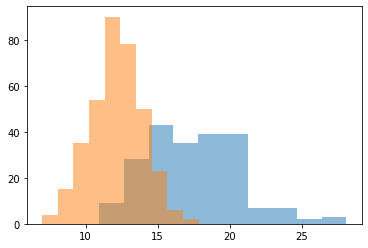

In [8]:
# show data
plt.hist(dataset['data'][:, 0][dataset['target']==0], label=dataset['target_names'][0], alpha=0.5)
plt.hist(dataset['data'][:, 0][dataset['target']==1], label=dataset['target_names'][1], alpha=0.5)
plt.show()

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [11]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

455 114
455 114


In [0]:
df = pd.DataFrame(data=X_train, columns=dataset.feature_names)

In [0]:
df['target'] = y_train

In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.890,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,0.06314,0.2963,1.5630,2.087,21.46,0.008872,0.04192,0.05946,0.017850,0.02793,0.004775,13.25,27.10,86.20,531.2,0.14050,0.3046,0.2806,0.11380,0.3397,0.08365,1
1,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,0.06132,0.8191,1.9310,4.493,103.90,0.008074,0.04088,0.05321,0.018340,0.02383,0.004515,22.66,30.93,145.30,1603.0,0.13900,0.3463,0.3912,0.17080,0.3007,0.08314,0
2,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,0.4311,2.2610,3.132,27.48,0.012860,0.08808,0.11970,0.024600,0.03880,0.017920,11.26,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620,1
3,13.800,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,0.2787,0.6205,1.957,23.35,0.004717,0.02065,0.01759,0.009206,0.01220,0.003130,16.57,20.86,110.30,812.4,0.14110,0.3542,0.2779,0.13830,0.2589,0.10300,0
4,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,0.6362,1.3050,4.312,76.36,0.005530,0.05296,0.06110,0.014440,0.02140,0.005036,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558,0


In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.071877,19.308132,91.628901,651.498681,0.096741,0.104839,0.089649,0.049052,0.181086,0.062996,0.411325,1.241549,2.913699,41.084176,0.007131,0.025927,0.032649,0.01197,0.020626,0.003827,16.239829,25.773011,107.087626,881.249231,0.133220,0.256558,0.275925,0.115262,0.289158,0.084226,0.624176
std,3.569510,4.293480,24.598203,360.413337,0.013953,0.052337,0.078786,0.038341,0.026866,0.007100,0.286760,0.564107,2.093563,47.971365,0.002976,0.017876,0.031456,0.00621,0.008439,0.002627,4.935764,6.198533,34.203384,590.789727,0.023141,0.158352,0.210078,0.065589,0.060825,0.018317,0.484868
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.362100,0.757000,6.802000,0.001713,0.002252,0.000000,0.00000,0.007882,0.000895,7.930000,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.675000,16.195000,74.795000,419.250000,0.086845,0.066015,0.029975,0.020715,0.162000,0.058220,0.234100,0.856450,1.644500,17.855000,0.005292,0.013710,0.015600,0.00814,0.015095,0.002269,13.010000,21.090000,83.945000,514.650000,0.117150,0.148600,0.120350,0.065280,0.250800,0.071465,0.000000
50%,13.270000,18.800000,85.840000,541.800000,0.096860,0.094620,0.065050,0.034380,0.179800,0.061660,0.327600,1.150000,2.326000,24.680000,0.006494,0.021150,0.026360,0.01112,0.018720,0.003288,14.920000,25.470000,97.590000,677.300000,0.133500,0.217600,0.238800,0.101700,0.281500,0.080240,1.000000
75%,15.635000,21.840000,103.050000,759.950000,0.105400,0.130350,0.126950,0.072020,0.195700,0.066370,0.480700,1.487500,3.427500,45.410000,0.008324,0.032790,0.042890,0.01507,0.023510,0.004565,18.280000,29.915000,123.800000,1030.500000,0.146400,0.341600,0.383100,0.162500,0.317500,0.092085,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426400,0.191300,0.290600,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.05279,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bc046f98>,
      dtype=object)

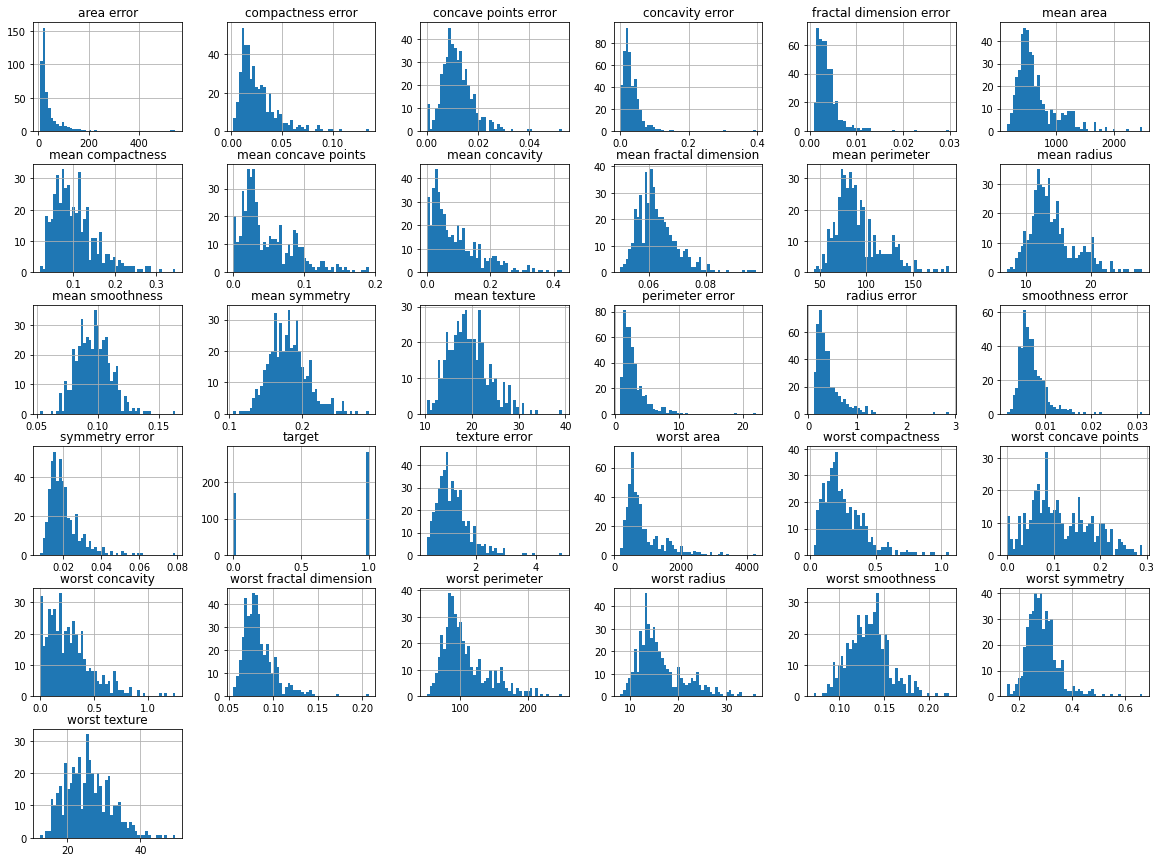

In [16]:
# show data
df.hist(bins=50, figsize=(20,15))

In [0]:
#standard correlation coefficient
corr_mx = df.corr()

In [18]:
corr_mx['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.073249
symmetry error             0.039468
texture error              0.015048
mean fractal dimension     0.013168
fractal dimension error   -0.080840
concavity error           -0.231324
compactness error         -0.290758
mean symmetry             -0.301436
worst fractal dimension   -0.331423
mean smoothness           -0.346441
worst symmetry            -0.383545
concave points error      -0.399473
worst smoothness          -0.422292
mean texture              -0.431519
worst texture             -0.477694
area error                -0.532024
perimeter error           -0.541040
radius error              -0.553362
worst compactness         -0.580742
mean compactness          -0.582706
worst concavity           -0.647455
mean concavity            -0.689667
mean area                 -0.691807
worst area                -0.715847
mean radius               -0.716429
mean perimeter            -0.728632
worst radius              -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bad049e8>,
      dtype=object)

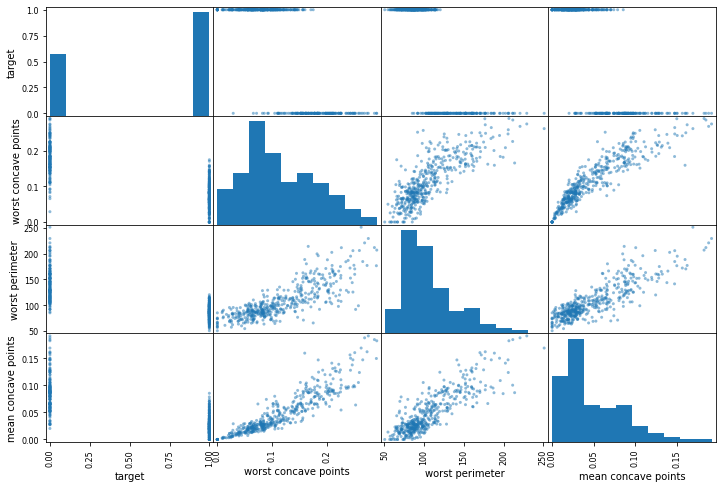

In [19]:
attributes = ['target', 'worst concave points', 'worst perimeter', 'mean concave points']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

In [0]:
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

In [0]:
def kth_cross_validation(model):
   #k-th cross validation
   cv = 3 #the number of foldings
   scores = cross_val_score(model, X_train_processed, y_train, cv=cv, scoring='accuracy')
   return scores

###Voting

In [0]:
models = [('decision tree', DecisionTreeClassifier()),
                ('random forest' , RandomForestClassifier()),
                ('extra trees' , ExtraTreesClassifier()),
                ('gradient boosting' , GradientBoostingClassifier()),
                ('xgboost' , XGBClassifier()),
                ('catboost' , CatBoostClassifier(verbose=False))]

In [0]:
def vote(models, vorting='hard'):
   voting = VotingClassifier(estimators=models, voting='hard')
   for model in models:
     scores = kth_cross_validation(model[1])
     print(model[0], scores.mean())
   print('voting ' + vorting, kth_cross_validation(voting).mean())

In [24]:
vote(models, vorting='hard')

decision tree 0.9231003834088533
random forest 0.9450737771581271
extra trees 0.960439177413733
gradient boosting 0.951710816777042
xgboost 0.9539037992331822
catboost 0.9560822586266992
voting hard 0.9539037992331824


In [25]:
vote(models, vorting='soft')

decision tree 0.9275153944463809
random forest 0.9516527245265481
extra trees 0.9626612059951203
gradient boosting 0.9495033112582781
xgboost 0.9539037992331822
catboost 0.9560822586266992
voting soft 0.9560967816893227


###Bagging/Pasting

In [0]:
def bag(model, option='bagging'):
    if option == 'bagging':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, oob_score=True)
       bagging.fit(X_train_processed, y_train)
       score = bagging.oob_score_
       print(option, score)
    elif option == 'pasting':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False)
       scores = kth_cross_validation(bagging)
       print(option, scores.mean())
    elif option == 'random patch':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, max_samples=0.8, oob_score=True)
       bagging.fit(X_train_processed, y_train)
       score = bagging.oob_score_
       print(option, score)
    elif option == 'random subspace':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False, max_samples=0.8)
       scores = kth_cross_validation(bagging)
       print(option, scores.mean())

In [27]:
bag(DecisionTreeClassifier(),option='bagging')

bagging 0.9494505494505494


In [28]:
bag(DecisionTreeClassifier(),option='pasting')

pasting 0.9296938538398978


In [29]:
bag(DecisionTreeClassifier(),option='random patch')

random patch 0.9560439560439561


In [30]:
bag(DecisionTreeClassifier(),option='random subspace')

random subspace 0.945073777158127


###Stacking

In [0]:
def stack(models):
   X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train_processed, y_train, test_size=0.5)

   y_train2_pred = []
   y_test_pred = []
   for model in models:
     model[1].fit(X_train1, y_train1)  
     y_train2_pred.append(model[1].predict(X_train2))
     y_test_pred.append(model[1].predict(X_test_processed))
  
   y_train2_pred = np.array(y_train2_pred)
   blender = DecisionTreeClassifier()
   blender.fit(y_train2_pred.transpose(), y_train2)

   y_test_pred = np.array(y_test_pred)
   y_test_pred = blender.predict(y_test_pred.transpose())
   score = accuracy_score(y_test, y_test_pred)
   print('stacking', score)

In [32]:
stack(models)

stacking 0.9824561403508771
